In [401]:
import pandas as pd

# Define file paths for each year of data
file_paths = {
    2016: 'efia2016_rv.csv',
    2017: 'efia2017_rv.csv',
    2018: 'efia2018_rv.csv',
    2019: 'efia2019_rv.csv',
    2020: 'efia2020_rv.csv',
    2021: 'efia2021_rv.csv',
    2022: 'efia2022_rv.csv'
}


# Define columns to keep and rename for clarity
columns_to_keep = {
    'UNITID': 'Institution_ID',
    'EFTEUG': 'Undergraduate_Enrollment_FTE',
    'EFTEGD': 'Graduate_Enrollment_FTE',
    'FTEUG': 'Reported_Undergraduate_Enrollment_FTE',
    'FTEGD': 'Reported_Graduate_Enrollment_FTE',
    'FTEDPP': 'Doctors_Professional_Practice_FTE',
    'ACTTYPE ': 'Activity_Type'
}

# Function to load and clean a single file, handling missing columns
def load_and_clean_data(file_path, columns_to_keep):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Check for matches between file columns and the specified columns_to_keep
    matched_columns = [col for col in df.columns if col in columns_to_keep]
    print(f"Processing file: {file_path}")
    print(f"Matched columns: {matched_columns}")
    print(f"Unmatched columns: {[col for col in columns_to_keep if col not in df.columns]}")
    
    # Rename columns if they exist in the current file
    df.rename(columns={col: columns_to_keep[col] for col in matched_columns}, inplace=True)
    # Select only the relevant columns that are in this file
    selected_columns = [columns_to_keep[col] for col in matched_columns]
    return df[selected_columns]

# Load, clean, and merge data from all years
merged_data = pd.concat(
    [load_and_clean_data(path, columns_to_keep).assign(Year=year) for year, path in file_paths.items()],
    ignore_index=True
)

# Save the merged data to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

print("Merged dataset saved as 'Merged_Enrollment_Data_2016_2022.csv'")


Processing file: efia2016_rv.csv
Matched columns: ['UNITID', 'EFTEUG', 'EFTEGD', 'FTEUG', 'FTEGD', 'FTEDPP', 'ACTTYPE ']
Unmatched columns: []
Processing file: efia2017_rv.csv
Matched columns: ['UNITID', 'EFTEUG', 'EFTEGD', 'FTEUG', 'FTEGD', 'FTEDPP', 'ACTTYPE ']
Unmatched columns: []
Processing file: efia2018_rv.csv
Matched columns: ['UNITID', 'EFTEUG', 'EFTEGD', 'FTEUG', 'FTEGD', 'FTEDPP', 'ACTTYPE ']
Unmatched columns: []
Processing file: efia2019_rv.csv
Matched columns: ['UNITID', 'EFTEUG', 'EFTEGD', 'FTEUG', 'FTEGD', 'FTEDPP', 'ACTTYPE ']
Unmatched columns: []
Processing file: efia2020_rv.csv
Matched columns: ['UNITID', 'EFTEUG', 'EFTEGD', 'FTEUG', 'FTEGD', 'FTEDPP', 'ACTTYPE ']
Unmatched columns: []
Processing file: efia2021_rv.csv
Matched columns: ['UNITID', 'EFTEUG', 'EFTEGD', 'FTEUG', 'FTEGD', 'FTEDPP', 'ACTTYPE ']
Unmatched columns: []
Processing file: efia2022_rv.csv
Matched columns: ['UNITID', 'EFTEUG', 'EFTEGD', 'FTEUG', 'FTEGD', 'FTEDPP', 'ACTTYPE ']
Unmatched columns: []

In [402]:
merged_data.head()

,Institution_ID,Undergraduate_Enrollment_FTE,Graduate_Enrollment_FTE,Reported_Undergraduate_Enrollment_FTE,Reported_Graduate_Enrollment_FTE,Doctors_Professional_Practice_FTE,Activity_Type,Year
0,100654,3977.0,828.0,3977.0,828.0,NaN,2,2016
1,100663,10174.0,4933.0,10174.0,4933.0,1544.0,2,2016
2,100690,255.0,158.0,255.0,158.0,NaN,2,2016
3,100706,5290.0,1144.0,5290.0,1144.0,61.0,2,2016
4,100724,4652.0,394.0,4652.0,394.0,139.0,2,2016


In [403]:
# Reorder the columns to place 'Year' at the beginning
column_order = ['Year'] + [col for col in merged_data.columns if col != 'Year']
merged_data = merged_data[column_order]

In [404]:
merged_data.head()

,Year,Institution_ID,Undergraduate_Enrollment_FTE,Graduate_Enrollment_FTE,Reported_Undergraduate_Enrollment_FTE,Reported_Graduate_Enrollment_FTE,Doctors_Professional_Practice_FTE,Activity_Type
0,2016,100654,3977.0,828.0,3977.0,828.0,NaN,2
1,2016,100663,10174.0,4933.0,10174.0,4933.0,1544.0,2
2,2016,100690,255.0,158.0,255.0,158.0,NaN,2
3,2016,100706,5290.0,1144.0,5290.0,1144.0,61.0,2
4,2016,100724,4652.0,394.0,4652.0,394.0,139.0,2


In [405]:
# Check for missing values in the entire dataset
missing_values = merged_data.isnull().sum()

# Display missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Focus specifically on Undergraduate and Graduate Enrollment columns
print("\nMissing Values for Undergraduate and Graduate Enrollment:")
print(merged_data[['Undergraduate_Enrollment_FTE', 'Graduate_Enrollment_FTE']].isnull().sum())

# Check the percentage of missing values
missing_percentage = (merged_data.isnull().sum() / len(merged_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

Missing Values in Each Column:
Year                                         0
Institution_ID                               0
Undergraduate_Enrollment_FTE              2067
Graduate_Enrollment_FTE                  30304
Reported_Undergraduate_Enrollment_FTE     2067
Reported_Graduate_Enrollment_FTE         30304
Doctors_Professional_Practice_FTE        39264
Activity_Type                                0
dtype: int64

Missing Values for Undergraduate and Graduate Enrollment:
Undergraduate_Enrollment_FTE     2067
Graduate_Enrollment_FTE         30304
dtype: int64

Percentage of Missing Values:
Year                                      0.000000
Institution_ID                            0.000000
Undergraduate_Enrollment_FTE              4.607566
Graduate_Enrollment_FTE                  67.550879
Reported_Undergraduate_Enrollment_FTE     4.607566
Reported_Graduate_Enrollment_FTE         67.550879
Doctors_Professional_Practice_FTE        87.523684
Activity_Type                             0.

In [406]:
# Create a new dataframe focusing only on undergraduate data
data = merged_data.drop(columns=[
    'Graduate_Enrollment_FTE',                  # Droping graduate enrollment
    'Reported_Graduate_Enrollment_FTE',         # Droping reported graduate enrollment
    'Doctors_Professional_Practice_FTE'         # Droping PhD/professional practice data
])

# Verify the new dataframe structure
print("Columns in the new dataframe:")
print(data.columns)

# Check the first few rows to ensure correctness
print("\nPreview of the new dataframe:")
print(data.head())

# Check for remaining missing values in undergraduate data
missing_values = data['Undergraduate_Enrollment_FTE'].isnull().sum()
print(f"\nMissing values in Undergraduate_Enrollment_FTE: {missing_values}")

Columns in the new dataframe:
Index(['Year', 'Institution_ID', 'Undergraduate_Enrollment_FTE',
       'Reported_Undergraduate_Enrollment_FTE', 'Activity_Type'],
      dtype='object')

Preview of the new dataframe:
   Year  Institution_ID  Undergraduate_Enrollment_FTE  \
0  2016          100654                        3977.0   
1  2016          100663                       10174.0   
2  2016          100690                         255.0   
3  2016          100706                        5290.0   
4  2016          100724                        4652.0   

   Reported_Undergraduate_Enrollment_FTE  Activity_Type  
0                                 3977.0              2  
1                                10174.0              2  
2                                  255.0              2  
3                                 5290.0              2  
4                                 4652.0              2  

Missing values in Undergraduate_Enrollment_FTE: 2067


In [407]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display missing values and their percentages
missing_percentage = (data.isnull().sum() / len(data)) * 100

print("Missing Values in Each Column:")
print(missing_values)

print("\nPercentage of Missing Values:")
print(missing_percentage)

Missing Values in Each Column:
Year                                        0
Institution_ID                              0
Undergraduate_Enrollment_FTE             2067
Reported_Undergraduate_Enrollment_FTE    2067
Activity_Type                               0
dtype: int64

Percentage of Missing Values:
Year                                     0.000000
Institution_ID                           0.000000
Undergraduate_Enrollment_FTE             4.607566
Reported_Undergraduate_Enrollment_FTE    4.607566
Activity_Type                            0.000000
dtype: float64


In [408]:
# Check if missing data is truly NaN or represented as 0
blank_check = data[data['Undergraduate_Enrollment_FTE'] == 0].shape[0]
print(f"Rows where Undergraduate_Enrollment_FTE is 0: {blank_check}")

# Check alignment of missing values between Undergraduate and Reported Undergraduate columns
aligned_missing = data[(data['Undergraduate_Enrollment_FTE'].isnull()) &
                        (data['Reported_Undergraduate_Enrollment_FTE'].isnull())].shape[0]

total_missing = data['Undergraduate_Enrollment_FTE'].isnull().sum()
print(f"\nTotal missing in Undergraduate_Enrollment_FTE: {total_missing}")
print(f"Aligned missing values (same rows missing in both columns): {aligned_missing}")

# Check if there are any mismatches in missing patterns
mismatched_missing = data[(data['Undergraduate_Enrollment_FTE'].isnull()) &
                          (~data['Reported_Undergraduate_Enrollment_FTE'].isnull())].shape[0]
print(f"Rows where missing data is mismatched between columns: {mismatched_missing}")

Rows where Undergraduate_Enrollment_FTE is 0: 15

Total missing in Undergraduate_Enrollment_FTE: 2067
Aligned missing values (same rows missing in both columns): 2067
Rows where missing data is mismatched between columns: 0


In [409]:
# Count rows where Reported_Undergraduate_Enrollment_FTE is 0
reported_zero_count = data[data['Reported_Undergraduate_Enrollment_FTE'] == 0].shape[0]
print(f"Rows where Reported_Undergraduate_Enrollment_FTE is 0: {reported_zero_count}")

Rows where Reported_Undergraduate_Enrollment_FTE is 0: 15


In [410]:
# Group by Year and count missing values in Undergraduate_Enrollment_FTE
missing_by_year = data[data['Undergraduate_Enrollment_FTE'].isnull()].groupby('Year').size()

print("Number of Missing Values in Undergraduate_Enrollment_FTE by Year:")
print(missing_by_year)

Number of Missing Values in Undergraduate_Enrollment_FTE by Year:
Year
2016    311
2017    307
2018    299
2019    300
2020    288
2021    284
2022    278
dtype: int64


In [411]:
# Group by Year and count missing values in Reported_Undergraduate_Enrollment_FTE
missing_by_year = data[data['Reported_Undergraduate_Enrollment_FTE'].isnull()].groupby('Year').size()

print("Number of Missing Values in Reported_Undergraduate_Enrollment_FTE by Year:")
print(missing_by_year)

Number of Missing Values in Reported_Undergraduate_Enrollment_FTE by Year:
Year
2016    311
2017    307
2018    299
2019    300
2020    288
2021    284
2022    278
dtype: int64


In [412]:
# Drop rows with missing values in Undergraduate Enrollment
data = data.dropna(subset=['Undergraduate_Enrollment_FTE'])

# Drop the redundant column
data = data.drop(columns=['Reported_Undergraduate_Enrollment_FTE'])

# Verify the shape of the dataset after dropping rows
print("Shape of dataset after dropping missing rows:", data.shape)

# Check for remaining missing values
print("Remaining Missing Values in the Dataset:")
print(data.isnull().sum())

Shape of dataset after dropping missing rows: (42794, 4)
Remaining Missing Values in the Dataset:
Year                            0
Institution_ID                  0
Undergraduate_Enrollment_FTE    0
Activity_Type                   0
dtype: int64


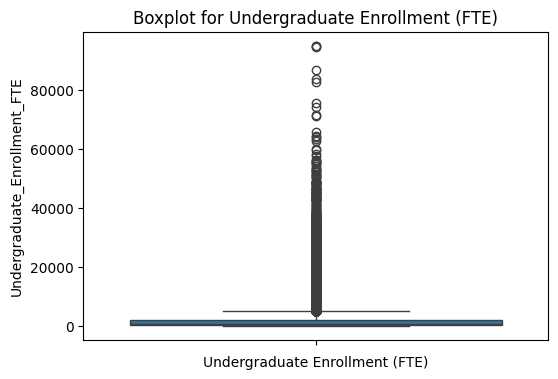

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Undergraduate Enrollment
plt.figure(figsize=(6, 4))
sns.boxplot(data['Undergraduate_Enrollment_FTE'])
plt.title('Boxplot for Undergraduate Enrollment (FTE)')
plt.xlabel('Undergraduate Enrollment (FTE)')
plt.show()

In [414]:
# Calculate IQR
Q1 = data['Undergraduate_Enrollment_FTE'].quantile(0.25)
Q3 = data['Undergraduate_Enrollment_FTE'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data['Undergraduate_Enrollment_FTE'] < lower_bound) |
                (data['Undergraduate_Enrollment_FTE'] > upper_bound)]

print(f"Number of Outliers: {outliers.shape[0]}")

# Preview outliers
print("Sample Outliers:")
print(outliers.head())

Number of Outliers: 5296
Sample Outliers:
    Year  Institution_ID  Undergraduate_Enrollment_FTE  Activity_Type
1   2016          100663                       10174.0              2
3   2016          100706                        5290.0              2
5   2016          100751                       30618.0              2
9   2016          100858                       21208.0              2
27  2016          101480                        6203.0              2


In [415]:
# Get unique Institution IDs
unique_institutions = data['Institution_ID'].unique()

# Count the number of unique institutions
num_institutions = len(unique_institutions)
print(f"Number of Unique Institutions: {num_institutions}")

Number of Unique Institutions: 7131


In [416]:
merged_data.head() # Display the first few rows of the merged data

,Year,Institution_ID,Undergraduate_Enrollment_FTE,Graduate_Enrollment_FTE,Reported_Undergraduate_Enrollment_FTE,Reported_Graduate_Enrollment_FTE,Doctors_Professional_Practice_FTE,Activity_Type
0,2016,100654,3977.0,828.0,3977.0,828.0,NaN,2
1,2016,100663,10174.0,4933.0,10174.0,4933.0,1544.0,2
2,2016,100690,255.0,158.0,255.0,158.0,NaN,2
3,2016,100706,5290.0,1144.0,5290.0,1144.0,61.0,2
4,2016,100724,4652.0,394.0,4652.0,394.0,139.0,2


In [417]:
# Drop columns not relevant to undergraduate analysis
columns_to_drop = ['Graduate_Enrollment_FTE', 'Reported_Graduate_Enrollment_FTE', 'Doctors_Professional_Practice_FTE', 'Undergraduate_Enrollment_FTE']
merged_data = merged_data.drop(columns=columns_to_drop)

# Verify the updated dataset
print("Shape of the dataset after dropping irrelevant columns:", merged_data.shape)

Shape of the dataset after dropping irrelevant columns: (44861, 4)


In [418]:
merged_data.head() # Display the first few rows of the updated dataset  

,Year,Institution_ID,Reported_Undergraduate_Enrollment_FTE,Activity_Type
0,2016,100654,3977.0,2
1,2016,100663,10174.0,2
2,2016,100690,255.0,2
3,2016,100706,5290.0,2
4,2016,100724,4652.0,2


In [419]:
# Load the sheet into a DataFrame
df = pd.read_excel("Institute ID -2023.xlsx") 

# Display the first few rows of the DataFrame
df.head()

,NSC_COLLEGE_AND_BRANCH_CODE,NSC_COLLEGE_NAME,IPEDS_UNIT_ID
0,000008-00,WADENA-TECH,NaN
1,000009-00,WADENA-TECH,NaN
2,000010-00,MANKATO TECH,NaN
3,000011-00,NW TECH-TWIN,NaN
4,000014-00,ART INSTITUTE OF VANCOUVER DOWNTOWN,NaN


In [420]:
# Remove duplicates from the new dataset based on IPEDS_UNIT_ID
deduplicated_df = df[['IPEDS_UNIT_ID', 'NSC_COLLEGE_NAME']].drop_duplicates(subset=['IPEDS_UNIT_ID'])

# Verify the shape of the deduplicated dataset
print("Shape of the deduplicated dataset:", deduplicated_df.shape)

Shape of the deduplicated dataset: (7427, 2)


In [421]:
# Perform a left merge with deduplicated data
merged_data = pd.merge(
    merged_data, 
    deduplicated_df, 
    how='left', 
    left_on='Institution_ID', 
    right_on='IPEDS_UNIT_ID'
)

# Rename and organize columns
merged_data.rename(columns={'NSC_COLLEGE_NAME': 'College_Name'}, inplace=True)

# Drop redundant column
merged_data.drop(columns=['IPEDS_UNIT_ID'], inplace=True)

# Verify the final shape and sample
print("Shape of the corrected dataset:", merged_data.shape)

Shape of the corrected dataset: (44861, 5)


In [422]:
merged_data.tail() # Display the last few rows of the updated dataset

,Year,Institution_ID,Reported_Undergraduate_Enrollment_FTE,Activity_Type,College_Name
44856,2022,498456,50.0,2,NaN
44857,2022,498465,44.0,1,NaN
44858,2022,498553,50.0,1,NaN
44859,2022,498562,10463.0,2,NaN
44860,2022,498571,9306.0,2,NaN


In [423]:
merged_data.head() # Display the first few rows of the updated dataset

,Year,Institution_ID,Reported_Undergraduate_Enrollment_FTE,Activity_Type,College_Name
0,2016,100654,3977.0,2,ALABAMA A & M UNIVERSITY
1,2016,100663,10174.0,2,"UNIVERSITY OF ALABAMA, BIRMINGHAM-TRADITIONAL"
2,2016,100690,255.0,2,AMRIDGE UNIVERSITY
3,2016,100706,5290.0,2,THE UNIVERSITY OF ALABAMA IN HUNTSVILLE
4,2016,100724,4652.0,2,ALABAMA STATE UNIVERSITY


In [424]:
# Calculate the number of missing values for each column
missing_counts = merged_data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentages = (merged_data.isnull().sum() / len(merged_data)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

# Display the summary of missing data
print("Summary of Missing Data:")
print(missing_summary)

# Optional: Save the summary to a CSV file
missing_summary.to_csv("missing_data_summary.csv", index=True)
print("Missing data summary saved to 'missing_data_summary.csv'.")

Summary of Missing Data:
                                       Missing Count  Missing Percentage
Year                                               0            0.000000
Institution_ID                                     0            0.000000
Reported_Undergraduate_Enrollment_FTE           2067            4.607566
Activity_Type                                      0            0.000000
College_Name                                    7773           17.326854
Missing data summary saved to 'missing_data_summary.csv'.


In [425]:
# Drop rows where Reported_Undergraduate_Enrollment_FTE is missing
merged_data = merged_data.dropna(subset=['Reported_Undergraduate_Enrollment_FTE'])

# Verify the updated dataset
print("Shape of the dataset after dropping rows with missing values:", merged_data.shape)

# Check if there are any remaining missing values
missing_counts = merged_data.isnull().sum()
print("\nRemaining Missing Data:")
print(missing_counts)

Shape of the dataset after dropping rows with missing values: (42794, 5)

Remaining Missing Data:
Year                                        0
Institution_ID                              0
Reported_Undergraduate_Enrollment_FTE       0
Activity_Type                               0
College_Name                             7671
dtype: int64


In [426]:
merged_data.head() # Display the first few rows of the updated dataset

,Year,Institution_ID,Reported_Undergraduate_Enrollment_FTE,Activity_Type,College_Name
0,2016,100654,3977.0,2,ALABAMA A & M UNIVERSITY
1,2016,100663,10174.0,2,"UNIVERSITY OF ALABAMA, BIRMINGHAM-TRADITIONAL"
2,2016,100690,255.0,2,AMRIDGE UNIVERSITY
3,2016,100706,5290.0,2,THE UNIVERSITY OF ALABAMA IN HUNTSVILLE
4,2016,100724,4652.0,2,ALABAMA STATE UNIVERSITY


In [ ]:
import requests

# Function to get state using Google Maps API
def get_state(college_name):
    params = {
        'address': college_name,
        'key': '*****' # While re-running the code block make sure to replace with your own API key
    }
    response = requests.get('https://maps.googleapis.com/maps/api/geocode/json', params=params).json()
    if response['status'] == 'OK':
        # Extract state from the API response
        for component in response['results'][0]['address_components']:
            if 'administrative_area_level_1' in component['types']:
                return component['long_name']
    return None

# Step 1: Extract unique college names
unique_college_names = merged_data['College_Name'].dropna().unique()

# Step 2: Query states for unique college names
college_to_state = {}  # Dictionary to store College_Name to State mapping

for idx, college in enumerate(unique_college_names):
    print(f"Processing {idx + 1}/{len(unique_college_names)}: {college}")
    if college not in college_to_state:  # Avoid duplicate queries
        state = get_state(college)
        college_to_state[college] = state

# Step 3: Map the states back to the merged_data dataframe
merged_data['State'] = merged_data['College_Name'].map(college_to_state)

# Step 4: Verify the updated dataset
print("Sample of updated merged_data with State column:")
print(merged_data[['Institution_ID', 'College_Name', 'State']].head())

Processing 1/5367: ALABAMA A & M UNIVERSITY
Processing 2/5367: UNIVERSITY OF ALABAMA, BIRMINGHAM-TRADITIONAL
Processing 3/5367: AMRIDGE UNIVERSITY
Processing 4/5367: THE UNIVERSITY OF ALABAMA IN HUNTSVILLE
Processing 5/5367: ALABAMA STATE UNIVERSITY
Processing 6/5367: UNIVERSITY OF ALABAMA
Processing 7/5367: CENTRAL ALABAMA COMMUNITY COLLEGE
Processing 8/5367: ATHENS STATE UNIVERSITY
Processing 9/5367: AUBURN UNIVERSITY AT MONTGOMERY
Processing 10/5367: AUBURN UNIVERSITY
Processing 11/5367: BIRMINGHAM-SOUTHERN COLLEGE
Processing 12/5367: CHATTAHOOCHEE VALLEY COMMUNITY COLLEGE
Processing 13/5367: CONCORDIA COLLEGE
Processing 14/5367: SOUTH UNIVERSITY-MONTGOMERY
Processing 15/5367: ENTERPRISE STATE COMMUNITY COLLEGE
Processing 16/5367: COASTAL ALABAMA COMMUNITY COLLEGE
Processing 17/5367: FAULKNER UNIVERSITY
Processing 18/5367: GADSDEN STATE COMMUNITY COLLEGE
Processing 19/5367: GEORGE C WALLACE COMMUNITY COLLEGE
Processing 20/5367: WALLACE STATE COMMUNITY COLLEGE
Processing 21/5367: WAL

In [429]:
# Save the updated DataFrame to the file
merged_data.to_csv('data_state.csv', index=False)
print("Dataset updated and saved as 'data_state.csv'.")

Dataset updated and saved as 'data_state.csv'.


In [430]:
merged_data.head() # Display the first few rows of the updated dataset  

,Year,Institution_ID,Reported_Undergraduate_Enrollment_FTE,Activity_Type,College_Name,State
0,2016,100654,3977.0,2,ALABAMA A & M UNIVERSITY,Alabama
1,2016,100663,10174.0,2,"UNIVERSITY OF ALABAMA, BIRMINGHAM-TRADITIONAL",Alabama
2,2016,100690,255.0,2,AMRIDGE UNIVERSITY,Alabama
3,2016,100706,5290.0,2,THE UNIVERSITY OF ALABAMA IN HUNTSVILLE,Alabama
4,2016,100724,4652.0,2,ALABAMA STATE UNIVERSITY,Alabama


In [431]:
merged_data.tail() # Display the last few rows of the updated dataset

,Year,Institution_ID,Reported_Undergraduate_Enrollment_FTE,Activity_Type,College_Name,State
44856,2022,498456,50.0,2,NaN,NaN
44857,2022,498465,44.0,1,NaN,NaN
44858,2022,498553,50.0,1,NaN,NaN
44859,2022,498562,10463.0,2,NaN,NaN
44860,2022,498571,9306.0,2,NaN,NaN


In [438]:
# Check missing values in College_Name and State columns
missing_values_summary = merged_data[['College_Name', 'State']].isnull().sum()

# Display the results
print("Missing Values in College_Name and State Columns:")
print(missing_values_summary)

# Calculate percentage of missing values for better understanding
missing_percentage = (merged_data[['College_Name', 'State']].isnull().sum() / len(merged_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

Missing Values in College_Name and State Columns:
College_Name     7671
State           11148
dtype: int64

Percentage of Missing Values:
College_Name    17.925410
State           26.050381
dtype: float64


In [439]:
# Filter rows where State is missing
missing_state_colleges = merged_data[merged_data['State'].isnull()]['College_Name'].dropna().unique()

# Display the number of unique college names with missing State
print(f"Number of unique College_Name values with missing State: {len(missing_state_colleges)}")

# Display a sample of the unique college names
print("Sample of unique College_Name values with missing State:")
print(missing_state_colleges[:10])

# Save the unique college names to a file for reference (optional)
pd.DataFrame(missing_state_colleges, columns=['College_Name']).to_csv('missing_state_colleges.csv', index=False)
print("Unique college names with missing State saved to 'missing_state_colleges.csv'.")

Number of unique College_Name values with missing State: 550
Sample of unique College_Name values with missing State:
['PIMA MEDICAL INSITUTE' 'GEORGE T BAKER AVIATION SCHOOL'
 'LEWIS M LIVELY AREA VOCATIONAL' 'SHERIDAN VOC TECHNICAL CENTER'
 'MR JUANS COLLEGE OF HAIR DESIGN' 'MR LEONS SCHOOL OF HAIR DESIGN'
 'MR JOHNS SCHOOL OF COSMETOLOGY ESTHETICS AND NAILS'
 'BROWN MACKIE COLLEGE-KANSAS CITY' 'CENTRAL BAPTIST THEOLOGICAL'
 'LA BARON HAIRDRESSING ACADEMY']
Unique college names with missing State saved to 'missing_state_colleges.csv'.


In [434]:
import pandas as pd

# Dictionary mapping College_Name to State
college_to_state_mapping = {
    "GEORGE C WALLACE COMMUNITY COLLEGE": "Alabama",
    "CHARTER COLLEGE": "",
    "COLLEGE AMERICA": "",
    "EARLS ACADEMY OF BEAUTY": "",
    "INTERNATIONAL ACADEMY OF HAIR DESIGN": "Arizona",
    "CLINTON TECHNICAL INSTITUTE - MOTORCYCLE MECH DIV": "",
    "PIMA COMMUNITY COLLEGE": "Arizona",
    "PIMA MEDICAL INSTITUTE": "",
    "ARTISTIC BEAUTY COLLEGES-GLENDALE": "Arizona",
    "CROWLEYS RIDGE VOCATIONAL": "Arkansas",
    "IMAGINE - PAUL MITCHELL PARTNER SCHOOL": "",
    "JEFFERSON REGIONAL MEDICAL CTR": "Pennsylvania",
    "NORTHWEST VOCATIONAL TECHNICAL": "",
    "THE ACADEMY OF RADIO BROADCASTING": "California",
    "AMERICAN RIVER COLLEGE LOS RIOS CC DISTRICT": "California",
    "CENTER FOR EMPLOYMENT TRAINING": "",
    "COSUMNES RIVER COLLEGE-LOS RIOS CC DISTRICT": "California",
    "ELEGANCE INTERNATIONAL": "California",
    "FASHION INSTITUTE OF DESIGN MERCHANDISING SF": "California",
    "GEMOLOGICAL INSTITUTE OF AMERICA": "California",
    "HAIR MASTERS UNIVERSITY": "",
    "INTERNATIONAL SCHOOL OF COSMETOLOGY": "",
    "LONG BEACH CITY COLLEGE": "California",
    "PROFESSIONAL INSTITUTE OF BEAUTY": "California",
    "SIERRA VALLEY BUSINESS COLLEGE": "",
    "CHARLES A. JONES SKILLS & BUSINESS ED CNTR": "California",
    "VICTOR VALLEY BEAUTY COLLEGE INC": "California",
    "YESHIVA OHR ELCHONON CHABAD WEST COAST TAL SEM": "California",
    "YUBA COMMUNITY COLLEGE": "California",
    "ACADEMY OF BEAUTY CULTURE": "",
    "REDSTONE COLLEGE": "Colorado",
    "DELTA MONTROSE AREA VOCATIONAL": "Colorado",
    "LINCOLN COLLEGE OF TECHNOLOGY": "",
    "HAIR DYNAMICS EDUCATION CENTER": "Colorado",
    "NATIONAL AMERICAN UNIVERSITY - COLORADO SPRINGS": "Colorado",
    "ARTISTIC BEAUTY COLLEGES-THORNTON": "Colorado",
    "BAIS BINYOMIN ACADEMY": "Connecticut",
    "NORTH HAVEN ACADEMY": "Connecticut",
    "AMERICAN INSTITUTE": "",
    "HOUSATONIC COMMUNITY COLLEGE": "Connecticut",
    "MIDDLESEX COMMUNITY COLLEGE": "",
    "NEW ENGLAND TRACTOR TRAILER TRAINING SCHOOL OF CON": "Connecticut",
    "PORTER AND CHESTER INSTITUTE": "Connecticut",
    "MARGARET H. ROLLINS SCHOOL OF NURSING AT BEEBE MED": "Delaware",
    "DAWN TRAINING CENTRE": "Delaware",
    "NATIONAL CONSERVATORY OF": "",
    "ATLANTIC VOCATIONAL TECHNICAL": "Florida",
    "JAMES LORENZO WALKER VOCATIONAL": "Florida",
    "FLORIDA TECHNICAL COLLEGE": "Florida",
    "GEORGE STONE AREA VOCATIONAL": "Florida",
    "GEORGE T. BAKER AVIATION SCHOOL": "Florida",
    "INTERNATIONAL ACADEMY": "",
    "THE ART INSTITUTES INTERNATIONAL LLC": "",
    "KEISER UNIVERSITY": "Florida",
    "LAKE COUNTY AREA VOCATIONAL": "",
    "LEWIS M. LIVELY AREA VOCATIONAL": "",
    "PASCO-HERNANDO STATE COLLEGE": "Florida",
    "RIDGE TECHNICAL CENTER": "Florida",
    "ROBERT MORGAN VOCATIONAL": "",
    "FIRST COAST TECHNICAL INSTITUTE": "",
    "SHERIDAN VOC TECH TECHNICAL CENTER": "",
    "SUWANNEE-HAMILTON AREA": "",
    "VALENCIA COLLEGE": "Florida",
    "WASHINGTON HOLMES AREA": "",
    "RASMUSSEN COLLEGE": "",
    "WESTSIDE TECH": "",
    "WITHLACOOCHEE VOCATIONAL AND": "",
    "GWINNETT COLLEGE": "Georgia",
    "PORTFOLIO CENTER": "Georgia",
    "MR JUAN'S COLLEGE OF HAIR DESIGN": "",
    "MR LEON'S SCHOOL OF HAIR DESIGN": "",
    "THE SCHOOL OF HAIRSTYLING": "",
    "ALVAREITAS COLLEGE OF COSMETOLOGY": "Illinois",
    "BLESSING HOSPITAL SCHOOL OF RADIOLOGIC TECHNOLOGY": "Illinois",
    "EMPIRE BEAUTY SCHOOL": "",
    "LA JAMES INTERNATIONAL COLLEGE": "Iowa",
    "CONCEPT COLLEGE OF COSMETOLOGY": "Illinois",
    "THE COSMETOLOGY AND SPA INSTITUTE": "Illinois",
    "FIRST INSTITUTE INC": "Illinois",
    "HAIR PROFESSIONALS ACADEMY OF COSMETOLOGY": "Illinois",
    "HAIR PROFESSIONALS CAREER COLLEGE INC": "Illinois",
    "HAIR PROFESSIONALS SCHOOL OF COSMETOLOGY": "Illinois",
    "JOLIET JUNIOR COLLEGE": "Illinois",
    "EDUCATORS OF BEAUTY": "Illinois",
    "MAC DANIELS BEAUTY SCHOOL": "",
    "METHODIST COLLEGE": "Illinois",
    "MIDSTATE COLLEGE": "Illinois",
    "MR JOHN'S SCHOOL OF COSMETOLOGY ESTHETICS AND NAILS": "Illinois",
    "SPANISH COALITION FOR JOBS INC": "Illinois",
    "WAUBONSEE COMMUNITY COLLEGE": "Illinois",
    "OAK POINT UNIVERSITY": "Illinois",
    "ANCILLA COLLEGE": "Indiana",
    "APEX ACADEMY OF HAIR DESIGN INC": "Indiana",
    "CREATIVE HAIR STYLING ACADEMY INC": "",
    "DON ROBERTS BEAUTY SCHOOL": "Indiana",
    "J MICHAEL HARROLD BEAUTY ACADEMY": "Indiana",
    "PJ'S COLLEGE OF COSMETOLOGY": "Indiana",
    "LAFAYETTE BEAUTY ACADEMY": "Indiana",
    "COMMONWEALTH BUSINESS COLLEGE": "",
    "A CUT ABOVE BEAUTY COLLEGE": "Indiana",
    "KAPLAN COLLEGE - MERRILLVILLE": "",
    "CAPRI COLLEGE": "Iowa",
    "CENTRAL COLLEGE": "Iowa",
    "IOWA LAKES COMMUNITY COLLEGE": "Iowa",
    "IOWA WESLEYAN UNIVERSITY": "Iowa",
    "LA JAMES COLLEGE OF HAIRSTYLING": "Iowa",
    "NORTHEAST IOWA COMMUNITY COLLEGE": "Iowa",
    "PROFESSIONAL COSMETOLOGY INSTITUTE": "",
    "COLLEGE OF HAIR DESIGN": "",
}

# Fill State column based on mapping
merged_data['State'] = merged_data.apply(
    lambda row: college_to_state_mapping.get(row['College_Name'], row['State'])
    if pd.isnull(row['State']) else row['State'], axis=1
)

# Save the updated DataFrame to a new file
merged_data.to_csv('merged_data.csv', index=False)
print("Dataset updated and saved as 'merged_data.csv'.")

# Verify progress
print(f"Remaining missing values in 'State': {merged_data['State'].isnull().sum()}")

Dataset updated and saved as 'merged_data.csv'.
Remaining missing values in 'State': 11148


In [3]:
import pandas as pd

# Load the dataset
merged_data = pd.read_csv('merged_data.csv')

# Drop rows where 'College_Name' or 'State' is missing
cleaned_data = merged_data.dropna(subset=['College_Name', 'State'])

# Save the cleaned dataset to a new file
cleaned_data.to_csv('cleaned_data.csv', index=False)

# Print information about the cleaned dataset
print(f"Rows before cleaning: {merged_data.shape[0]}")
print(f"Rows after cleaning: {cleaned_data.shape[0]}")
print("Cleaned dataset saved as 'cleaned_data.csv'.")

Rows before cleaning: 42794
Rows after cleaning: 31311
Cleaned dataset saved as 'cleaned_data.csv'.


In [4]:
# Get unique values in the 'State' column
unique_states = cleaned_data['State'].unique()

# Display the unique states
print("Unique states in the dataset:")
for state in unique_states:
    print(state)

Unique states in the dataset:
Alabama
Minnesota
Colorado
Alaska
Arizona
New Jersey
California
Georgia
Arkansas
Louisiana
Pennsylvania
Tennessee
Connecticut
New York
Washington
Texas
Maryland
Saskatchewan
South Carolina
Delaware
District of Columbia
Florida
England
North Carolina
Mississippi
Illinois
Kentucky
Massachusetts
Hawaii
Idaho
Iowa
Quebec
Kansas
Indiana
Michigan
Maine
West Virginia
Missouri
Ontario
Oregon
Dubai
Ohio
Nebraska
Montana
Nevada
New Hampshire
New Mexico
North Dakota
Baden-Württemberg
Vermont
Oklahoma
Wyoming
Balqa Governorate
Rhode Island
South Dakota
Wisconsin
Utah
Virginia
Western District
Saipan
Bayamón
Manatí
Mayagüez
Guaynabo
Caguas
San Juan
Carolina
Ponce
San Sebastián
Juana Díaz
Humacao
San Juan Province
San Germán
Aguadilla
Barranquitas
Fajardo
Guayama
Arecibo
Cayey
Utuado
Gurabo
Pohnpei
Koror
St. Thomas
Manitoba
Vega Baja
Arroyo
Majuro Atoll
Yauco
Victoria
Isabela
Río Grande
Moca
Aguada
Addis Ababa
Hatillo
Región Metropolitana
Villalba


In [5]:
# Check for missing values in the entire dataset
missing_summary = cleaned_data.isnull().sum()

# Check specifically for blanks or empty strings in the 'State' column
blank_states = cleaned_data[cleaned_data['State'] == ''].shape[0]

print("Summary of missing values in the dataset:")
print(missing_summary)

print(f"\nNumber of blank values in 'State': {blank_states}")

Summary of missing values in the dataset:
Year                                     0
Institution_ID                           0
Reported_Undergraduate_Enrollment_FTE    0
Activity_Type                            0
College_Name                             0
State                                    0
dtype: int64

Number of blank values in 'State': 0


In [6]:
# Standard list of U.S. states and territories
us_states_and_territories = {
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
    "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri",
    "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",
    "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee",
    "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin",
    "Wyoming", 
    # Territories
    "Puerto Rico", "Guam", "Northern Mariana Islands", "American Samoa", "U.S. Virgin Islands",
}

# Given list of unique locations from your dataset
unique_locations = [
    "Alabama", "Minnesota", "Colorado", "Alaska", "Arizona", "New Jersey", "California", "Georgia",
    "Arkansas", "Louisiana", "Pennsylvania", "Tennessee", "Connecticut", "New York", "Washington",
    "Texas", "Maryland", "Saskatchewan", "South Carolina", "Delaware", "District of Columbia",
    "Florida", "England", "North Carolina", "Mississippi", "Illinois", "Kentucky", "Massachusetts",
    "Hawaii", "Idaho", "Iowa", "Quebec", "Kansas", "Indiana", "Michigan", "Maine", "West Virginia",
    "Missouri", "Ontario", "Oregon", "Dubai", "Ohio", "Nebraska", "Montana", "Nevada",
    "New Hampshire", "New Mexico", "North Dakota", "Baden-Württemberg", "Vermont", "Oklahoma",
    "Wyoming", "Balqa Governorate", "Rhode Island", "South Dakota", "Wisconsin", "Utah", "Virginia",
    "Western District", "Saipan", "Bayamón", "Manatí", "Mayagüez", "Guaynabo", "Caguas",
    "San Juan", "Carolina", "Ponce", "San Sebastián", "Juana Díaz", "Humacao", "San Juan Province",
    "San Germán", "Aguadilla", "Barranquitas", "Fajardo", "Guayama", "Arecibo", "Cayey",
    "Utuado", "Gurabo", "Pohnpei", "Koror", "St. Thomas", "Manitoba", "Vega Baja", "Arroyo",
    "Majuro Atoll", "Yauco", "Victoria", "Isabela", "Río Grande", "Moca", "Aguada",
    "Addis Ababa", "Hatillo", "Región Metropolitana", "Villalba"
]

# Identify locations not in the U.S. list
non_us_locations = [loc for loc in unique_locations if loc not in us_states_and_territories]

print("Locations not in the U.S.:")
print(non_us_locations)

Locations not in the U.S.:
['Saskatchewan', 'England', 'Quebec', 'Ontario', 'Dubai', 'Baden-Württemberg', 'Balqa Governorate', 'Western District', 'Saipan', 'Bayamón', 'Manatí', 'Mayagüez', 'Guaynabo', 'Caguas', 'San Juan', 'Carolina', 'Ponce', 'San Sebastián', 'Juana Díaz', 'Humacao', 'San Juan Province', 'San Germán', 'Aguadilla', 'Barranquitas', 'Fajardo', 'Guayama', 'Arecibo', 'Cayey', 'Utuado', 'Gurabo', 'Pohnpei', 'Koror', 'St. Thomas', 'Manitoba', 'Vega Baja', 'Arroyo', 'Majuro Atoll', 'Yauco', 'Victoria', 'Isabela', 'Río Grande', 'Moca', 'Aguada', 'Addis Ababa', 'Hatillo', 'Región Metropolitana', 'Villalba']


In [7]:
# List of locations not in the U.S.
non_us_locations = [
    'Saskatchewan', 'England', 'Quebec', 'Ontario', 'Dubai', 'Baden-Württemberg',
    'Balqa Governorate', 'Western District', 'Saipan', 'Bayamón', 'Manatí', 
    'Mayagüez', 'Guaynabo', 'Caguas', 'San Juan', 'Carolina', 'Ponce', 
    'San Sebastián', 'Juana Díaz', 'Humacao', 'San Juan Province', 'San Germán', 
    'Aguadilla', 'Barranquitas', 'Fajardo', 'Guayama', 'Arecibo', 'Cayey', 
    'Utuado', 'Gurabo', 'Pohnpei', 'Koror', 'St. Thomas', 'Manitoba', 
    'Vega Baja', 'Arroyo', 'Majuro Atoll', 'Yauco', 'Victoria', 'Isabela', 
    'Río Grande', 'Moca', 'Aguada', 'Addis Ababa', 'Hatillo', 'Región Metropolitana', 'Villalba'
]

# Drop rows with missing 'State' or 'College_Name' values
cleaned_data = cleaned_data.dropna(subset=['State', 'College_Name'])

# Remove rows with 'State' values not in the U.S.
cleaned_data = cleaned_data[~cleaned_data['State'].isin(non_us_locations)]

# Save the cleaned dataframe to a CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)

# Display information about the cleaned dataset
print("Dataframe cleaned and saved as 'cleaned_data.csv'.")
print(f"Number of rows: {len(cleaned_data)}")
print(f"Unique states in the dataset: {cleaned_data['State'].nunique()}")
print(f"Sample data:\n{cleaned_data.head()}")

Dataframe cleaned and saved as 'cleaned_data.csv'.
Number of rows: 30488
Unique states in the dataset: 51
Sample data:
   Year  Institution_ID  Reported_Undergraduate_Enrollment_FTE  Activity_Type  \
0  2016          100654                                 3977.0              2   
1  2016          100663                                10174.0              2   
2  2016          100690                                  255.0              2   
3  2016          100706                                 5290.0              2   
4  2016          100724                                 4652.0              2   

                                    College_Name    State  
0                       ALABAMA A & M UNIVERSITY  Alabama  
1  UNIVERSITY OF ALABAMA, BIRMINGHAM-TRADITIONAL  Alabama  
2                             AMRIDGE UNIVERSITY  Alabama  
3        THE UNIVERSITY OF ALABAMA IN HUNTSVILLE  Alabama  
4                       ALABAMA STATE UNIVERSITY  Alabama  


Dataset Shape: (30488, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 42736
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   30488 non-null  int64  
 1   Institution_ID                         30488 non-null  int64  
 2   Reported_Undergraduate_Enrollment_FTE  30488 non-null  float64
 3   Activity_Type                          30488 non-null  int64  
 4   College_Name                           30488 non-null  object 
 5   State                                  30488 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.6+ MB
None

Sample of Dataset:
   Year  Institution_ID  Reported_Undergraduate_Enrollment_FTE  Activity_Type  \
0  2016          100654                                 3977.0              2   
1  2016          100663                                10174.0 

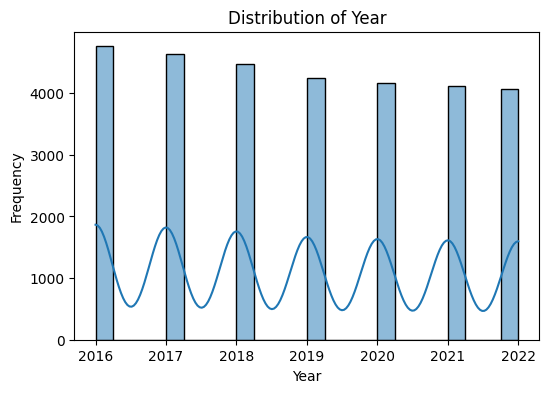

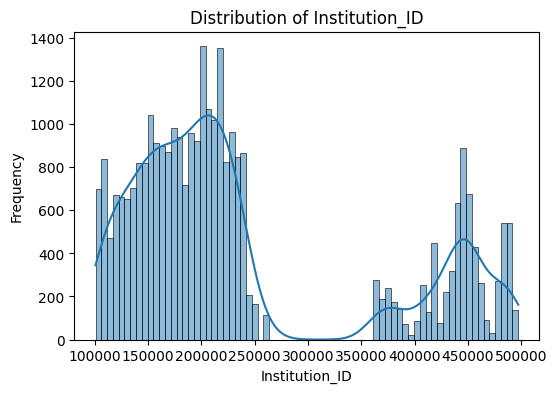

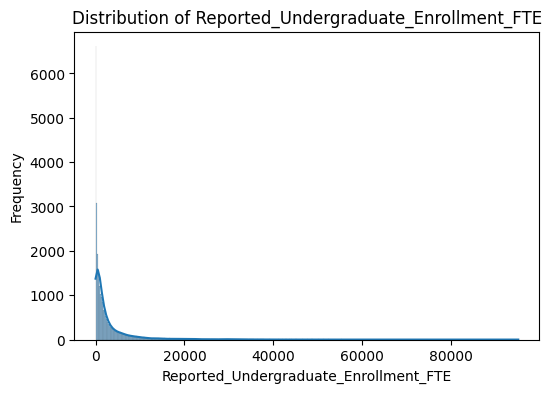

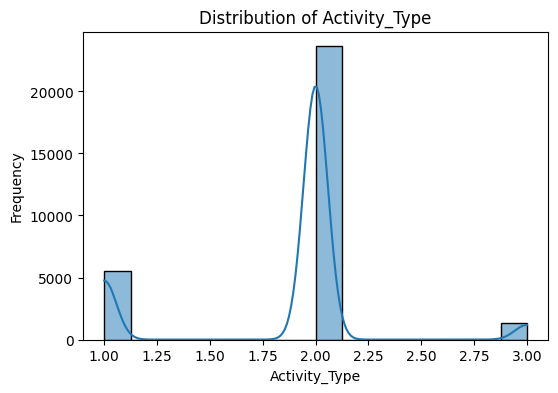

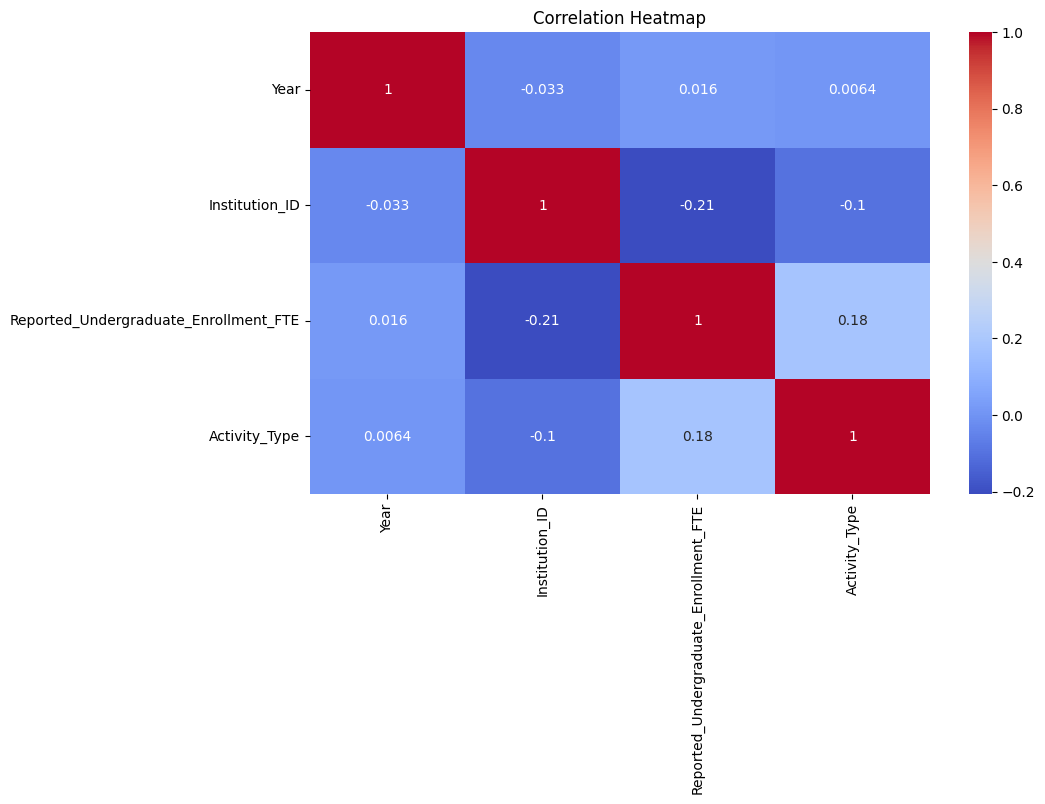


Categorical Columns: Index(['College_Name', 'State'], dtype='object')

Unique values in College_Name:
College_Name
CHAMBERLAIN UNIVERSITY                          103
UNIVERSITY OF PHOENIX                            59
KENT STATE UNIVERSITY                            56
OHIO UNIVERSITY                                  42
UNIVERSITY OF CONNECTICUT                        34
                                               ... 
L T INTERNATIONAL BEAUTY SCHOOL                   1
CULINARY ACADEMY OF LONG ISLAND                   1
ALTIERUS CAREER COLLEGE- HOUSTON GREENSPOINT      1
ALTIERUS CAREER COLLEGE- JACKSONVILLE             1
GALEN COLLEGE OF NURSING- NASHVILLE CAMPUS        1
Name: count, Length: 4656, dtype: int64


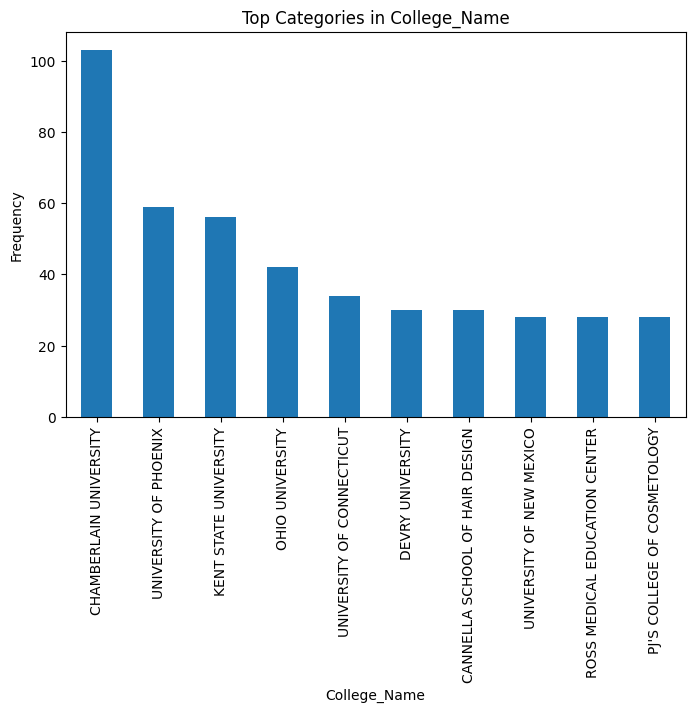


Unique values in State:
State
California              2967
New York                2004
Texas                   1759
Pennsylvania            1740
Ohio                    1454
Florida                 1446
Illinois                1349
North Carolina           989
Massachusetts            861
Georgia                  775
Tennessee                768
Michigan                 747
Virginia                 728
Missouri                 703
New Jersey               671
Minnesota                627
Arizona                  598
Oklahoma                 593
Washington               563
Louisiana                540
Iowa                     521
Indiana                  520
Wisconsin                476
South Carolina           474
Alabama                  468
Kansas                   456
Arkansas                 452
Colorado                 441
Oregon                   427
Maryland                 417
Connecticut              381
Kentucky                 376
West Virginia            366
Utah        

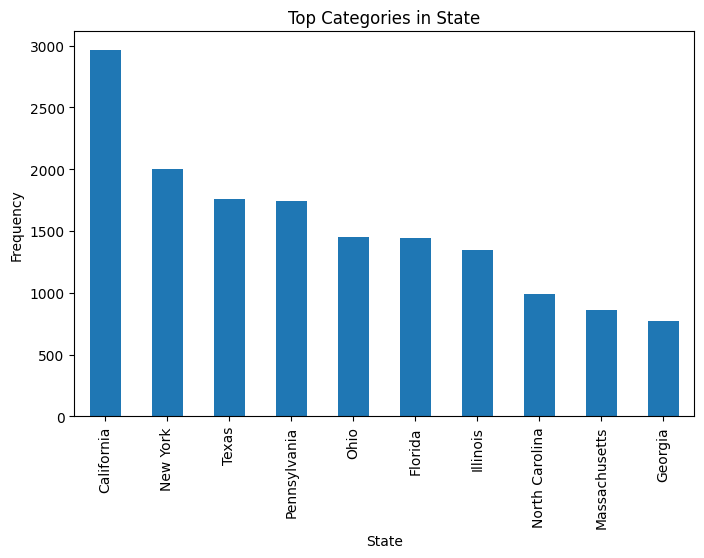

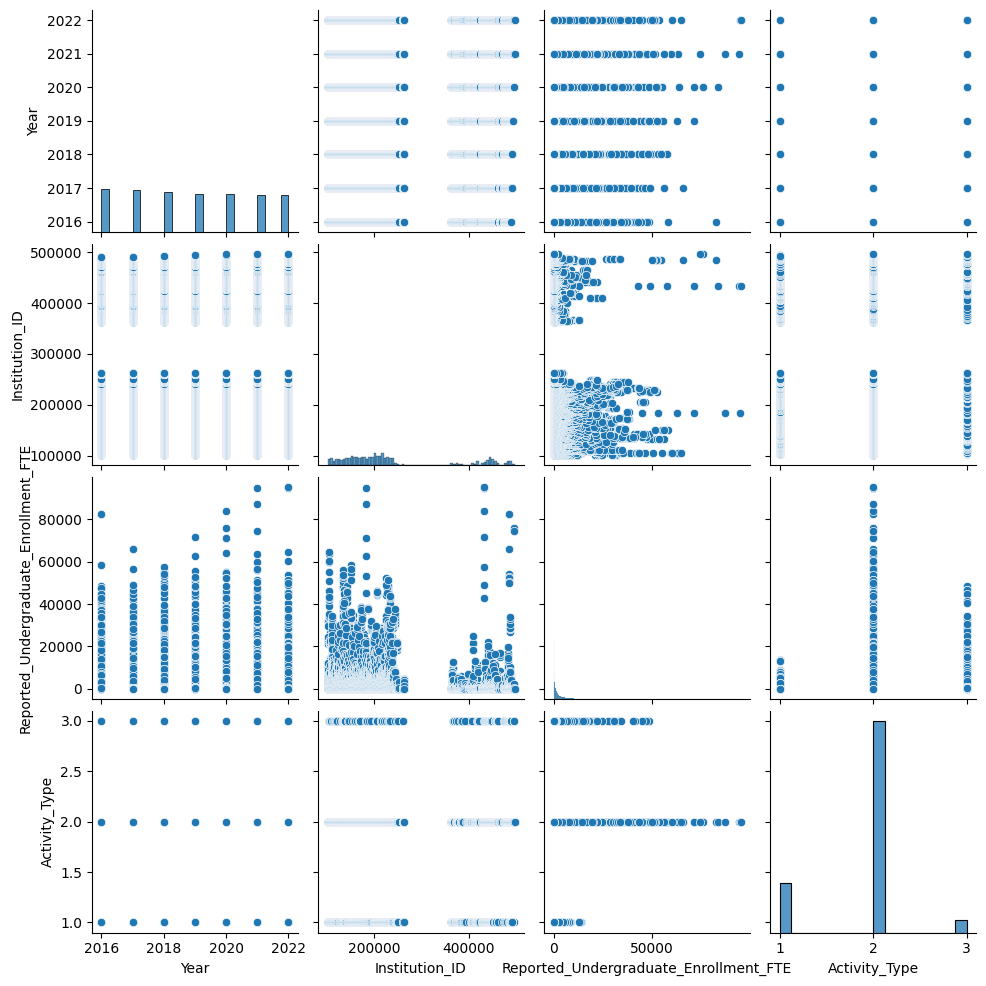

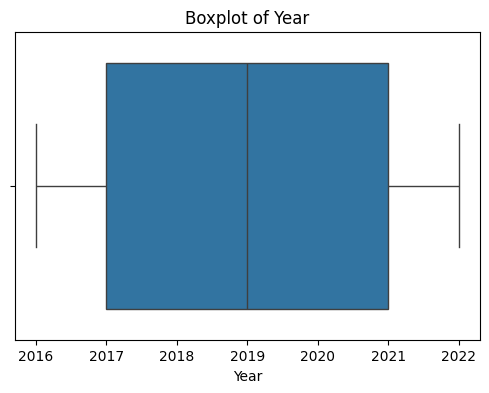

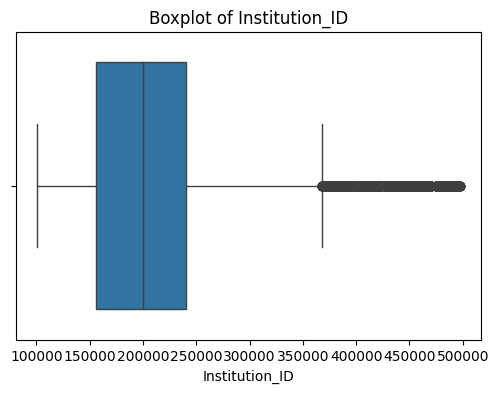

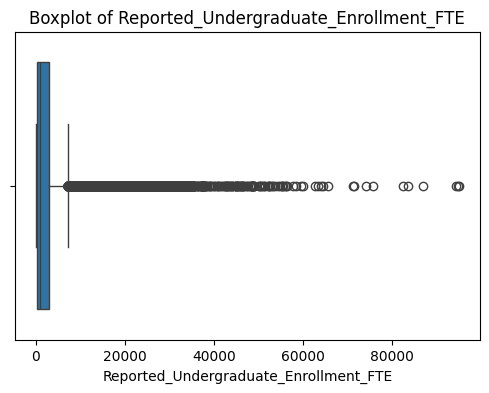

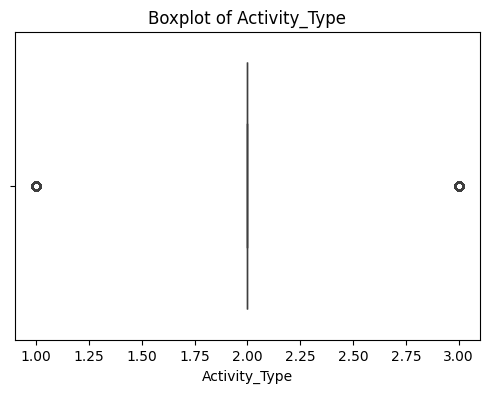

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Overview of the dataset
print("Dataset Shape:", cleaned_data.shape)
print("\nDataset Info:")
print(cleaned_data.info())
print("\nSample of Dataset:")
print(cleaned_data.head())

# Step 2: Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(cleaned_data.describe())

print("\nDescriptive Statistics for Categorical Columns:")
print(cleaned_data.describe(include=['object']))

# Step 3: Check Missing Values
missing_values = cleaned_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Step 4: Analyze Numerical Variables
numerical_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns:", numerical_cols)

# Visualize distributions of numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(cleaned_data[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Analyze Categorical Variables
categorical_cols = cleaned_data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(cleaned_data[col].value_counts())

    # Bar plot for top 10 categories
    plt.figure(figsize=(8, 5))
    cleaned_data[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Step 6: Visualize Relationships
# Pairplot for numerical variables
sns.pairplot(cleaned_data[numerical_cols])
plt.show()

# Boxplot for outlier detection
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cleaned_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [9]:
# Split data into pre-COVID and post-COVID periods
pre_covid_data = cleaned_data[cleaned_data['Year'] < 2020]
post_covid_data = cleaned_data[cleaned_data['Year'] >= 2020]

# Display summary statistics for both periods
print("Pre-COVID Summary:")
print(pre_covid_data.describe())

print("\nPost-COVID Summary:")
print(post_covid_data.describe())

Pre-COVID Summary:
               Year  Institution_ID  Reported_Undergraduate_Enrollment_FTE  \
count  18137.000000    18137.000000                           18137.000000   
mean    2017.453438   241849.844076                            2909.951150   
std        1.114253   118621.686471                            5466.794754   
min     2016.000000   100654.000000                               0.000000   
25%     2016.000000   156338.000000                             213.000000   
50%     2017.000000   201496.000000                             933.000000   
75%     2018.000000   249609.000000                            2964.000000   
max     2019.000000   494685.000000                           82671.000000   

       Activity_Type  
count   18137.000000  
mean        1.862491  
std         0.462717  
min         1.000000  
25%         2.000000  
50%         2.000000  
75%         2.000000  
max         3.000000  

Post-COVID Summary:
               Year  Institution_ID  Reported_Unde

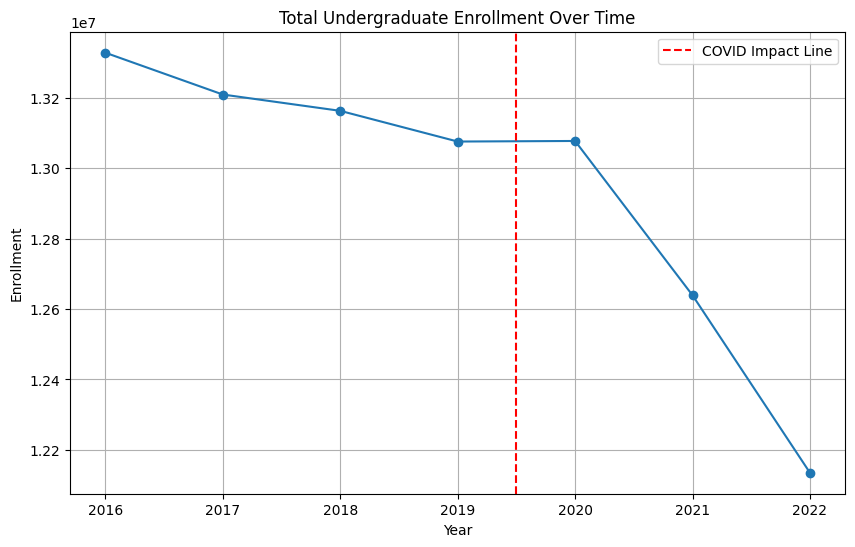

In [10]:
# Aggregate data by year
enrollment_by_year = cleaned_data.groupby('Year')['Reported_Undergraduate_Enrollment_FTE'].sum()

# Plot enrollment trends
plt.figure(figsize=(10, 6))
plt.plot(enrollment_by_year.index, enrollment_by_year.values, marker='o')
plt.title('Total Undergraduate Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.axvline(2019.5, color='red', linestyle='--', label='COVID Impact Line')
plt.legend()
plt.grid()
plt.show()

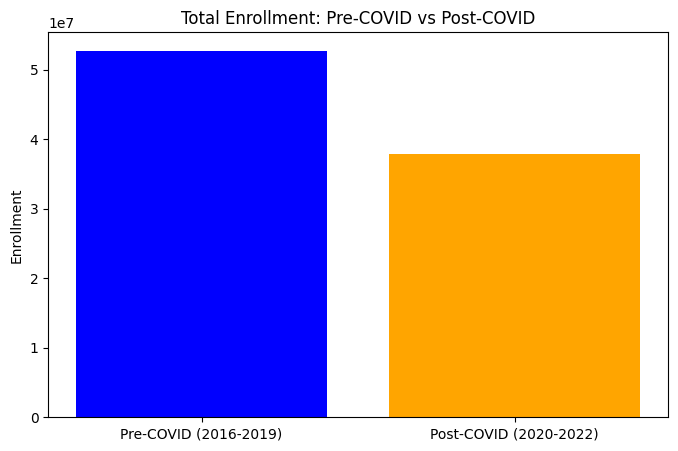

In [11]:
# Aggregate enrollment for pre-COVID and post-COVID
pre_covid_enrollment = pre_covid_data['Reported_Undergraduate_Enrollment_FTE'].sum()
post_covid_enrollment = post_covid_data['Reported_Undergraduate_Enrollment_FTE'].sum()

# Bar plot comparison
plt.figure(figsize=(8, 5))
plt.bar(['Pre-COVID (2016-2019)', 'Post-COVID (2020-2022)'],
        [pre_covid_enrollment, post_covid_enrollment],
        color=['blue', 'orange'])
plt.title('Total Enrollment: Pre-COVID vs Post-COVID')
plt.ylabel('Enrollment')
plt.show()

In [12]:
# Group by State and calculate mean enrollment for each period
pre_covid_statewise = pre_covid_data.groupby('State')['Reported_Undergraduate_Enrollment_FTE'].mean()
post_covid_statewise = post_covid_data.groupby('State')['Reported_Undergraduate_Enrollment_FTE'].mean()

# Combine into a single DataFrame
statewise_comparison = pd.DataFrame({
    'Pre-COVID': pre_covid_statewise,
    'Post-COVID': post_covid_statewise
}).dropna()

# Calculate percentage change
statewise_comparison['% Change'] = (
    (statewise_comparison['Post-COVID'] - statewise_comparison['Pre-COVID']) / statewise_comparison['Pre-COVID']
) * 100

# Sort by percentage change
statewise_comparison = statewise_comparison.sort_values(by='% Change', ascending=False)
print(statewise_comparison.head(10))  # Display top 10 states with the largest changes

                        Pre-COVID   Post-COVID   % Change
State                                                    
Utah                  4701.846535  7173.052632  52.558204
New Hampshire         3277.304348  4670.000000  42.495158
District of Columbia  3366.420000  4195.064516  24.615007
Arizona               4377.561170  5351.189189  22.241334
Colorado              3645.179775  4272.224138  17.202015
Delaware              2788.650000  3161.894737  13.384424
Idaho                 4999.896104  5592.500000  11.852324
Texas                 3680.983840  4116.219236  11.823888
Georgia               3196.327586  3529.974277  10.438439
Vermont               1848.028169  2034.622222  10.096927


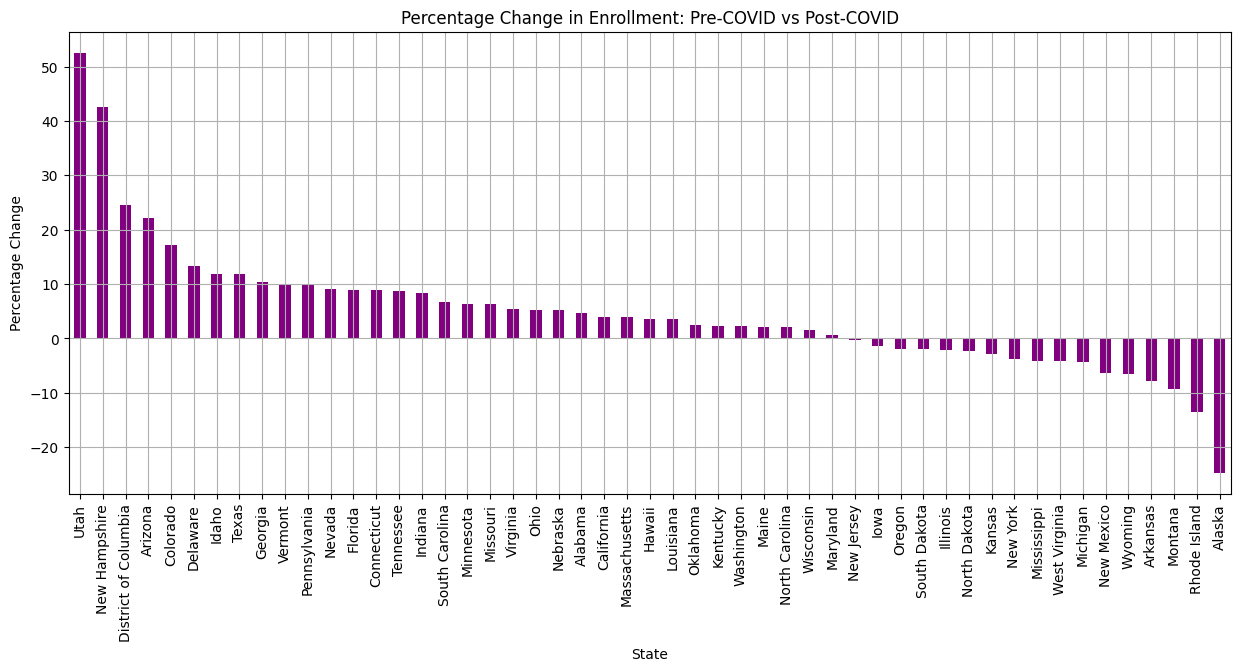

In [13]:
# Plot state-level percentage change
statewise_comparison['% Change'].plot(kind='bar', figsize=(15, 6), color='purple')
plt.title('Percentage Change in Enrollment: Pre-COVID vs Post-COVID')
plt.xlabel('State')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [14]:
# Define periods
recession_period = cleaned_data[(cleaned_data['Year'] >= 2020) & (cleaned_data['Year'] <= 2021)]
pre_recession_period = cleaned_data[cleaned_data['Year'] < 2020]
post_recession_period = cleaned_data[cleaned_data['Year'] > 2021]

# Calculate average enrollments for each period
avg_enrollment_pre = pre_recession_period['Reported_Undergraduate_Enrollment_FTE'].mean()
avg_enrollment_recession = recession_period['Reported_Undergraduate_Enrollment_FTE'].mean()
avg_enrollment_post = post_recession_period['Reported_Undergraduate_Enrollment_FTE'].mean()

# Display results
print(f"Average Enrollment Pre-Recession (2016-2019): {avg_enrollment_pre:.2f}")
print(f"Average Enrollment During Recession (2020-2021): {avg_enrollment_recession:.2f}")
print(f"Average Enrollment Post-Recession (2022): {avg_enrollment_post:.2f}")

Average Enrollment Pre-Recession (2016-2019): 2909.95
Average Enrollment During Recession (2020-2021): 3106.66
Average Enrollment Post-Recession (2022): 2979.33


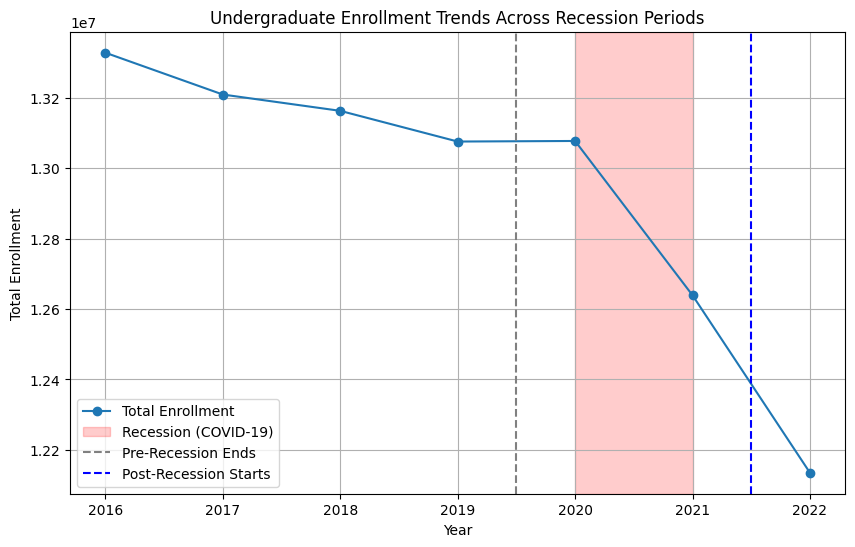

In [15]:
# Aggregate enrollments by year
enrollment_trends = cleaned_data.groupby('Year')['Reported_Undergraduate_Enrollment_FTE'].sum()

# Plot trends
plt.figure(figsize=(10, 6))
plt.plot(enrollment_trends.index, enrollment_trends.values, marker='o', label='Total Enrollment')
plt.axvspan(2020, 2021, color='red', alpha=0.2, label='Recession (COVID-19)')
plt.axvline(2019.5, color='gray', linestyle='--', label='Pre-Recession Ends')
plt.axvline(2021.5, color='blue', linestyle='--', label='Post-Recession Starts')
plt.title('Undergraduate Enrollment Trends Across Recession Periods')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Group by state and calculate average enrollment for each period
statewise_recession = {
    'Pre-Recession': pre_recession_period.groupby('State')['Reported_Undergraduate_Enrollment_FTE'].mean(),
    'Recession': recession_period.groupby('State')['Reported_Undergraduate_Enrollment_FTE'].mean(),
    'Post-Recession': post_recession_period.groupby('State')['Reported_Undergraduate_Enrollment_FTE'].mean()
}

# Convert to DataFrame
statewise_comparison = pd.DataFrame(statewise_recession)

# Calculate percentage change from Pre-Recession to Recession
statewise_comparison['% Change Pre to Recession'] = (
    (statewise_comparison['Recession'] - statewise_comparison['Pre-Recession']) / statewise_comparison['Pre-Recession']
) * 100

# Sort by percentage change
statewise_comparison = statewise_comparison.sort_values(by='% Change Pre to Recession', ascending=False)

# Display top and bottom states
print("Top 5 States with Enrollment Growth During Recession:")
print(statewise_comparison.head(5))
print("\nTop 5 States with Enrollment Decline During Recession:")
print(statewise_comparison.tail(5))

Top 5 States with Enrollment Growth During Recession:
                      Pre-Recession    Recession  Post-Recession  \
State                                                              
Utah                    4701.846535  6973.000000     7606.500000   
New Hampshire           3277.304348  4450.240741     5126.423077   
District of Columbia    3366.420000  4107.666667     4378.600000   
Arizona                 4377.561170  5293.271523     5474.366197   
Pennsylvania            1783.814042  2117.911894     1659.715517   

                      % Change Pre to Recession  
State                                            
Utah                                  48.303437  
New Hampshire                         35.789669  
District of Columbia                  22.018841  
Arizona                               20.918277  
Pennsylvania                          18.729410  

Top 5 States with Enrollment Decline During Recession:
              Pre-Recession    Recession  Post-Recession  \
Sta

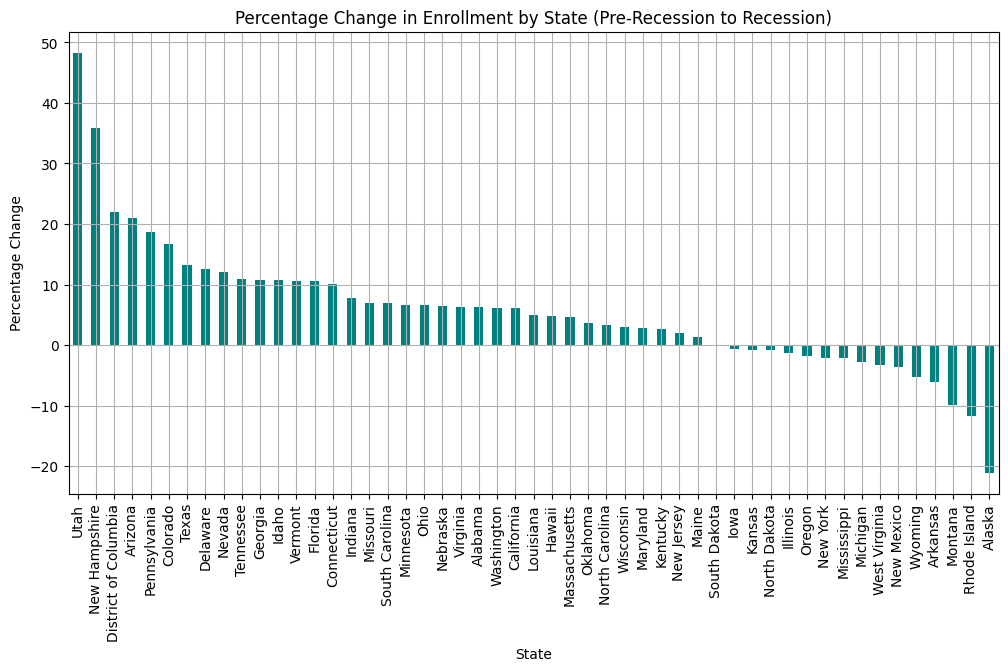

In [17]:
# Plot percentage change for states
plt.figure(figsize=(12, 6))
statewise_comparison['% Change Pre to Recession'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Percentage Change in Enrollment by State (Pre-Recession to Recession)')
plt.xlabel('State')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.grid()
plt.show()


Regression Summary for Pre-Recession (Pre-COVID):

                                      OLS Regression Results                                     
Dep. Variable:     Reported_Undergraduate_Enrollment_FTE   R-squared:                       0.036
Model:                                               OLS   Adj. R-squared:                  0.036
Method:                                    Least Squares   F-statistic:                     336.3
Date:                                   Thu, 05 Dec 2024   Prob (F-statistic):          4.06e-144
Time:                                           23:44:58   Log-Likelihood:            -1.8150e+05
No. Observations:                                  18137   AIC:                         3.630e+05
Df Residuals:                                      18134   BIC:                         3.630e+05
Df Model:                                              2                                         
Covariance Type:                               nonrobust          

/var/folders/wj/1_k181jj7cz52k1hk5hwk0qr0000gn/T/ipykernel_16537/45319413.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_recession['Period'] = 'Pre-Recession'
/var/folders/wj/1_k181jj7cz52k1hk5hwk0qr0000gn/T/ipykernel_16537/45319413.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recession['Period'] = 'Recession'
/var/folders/wj/1_k181jj7cz52k1hk5hwk0qr0000gn/T/ipykernel_16537/45319413.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

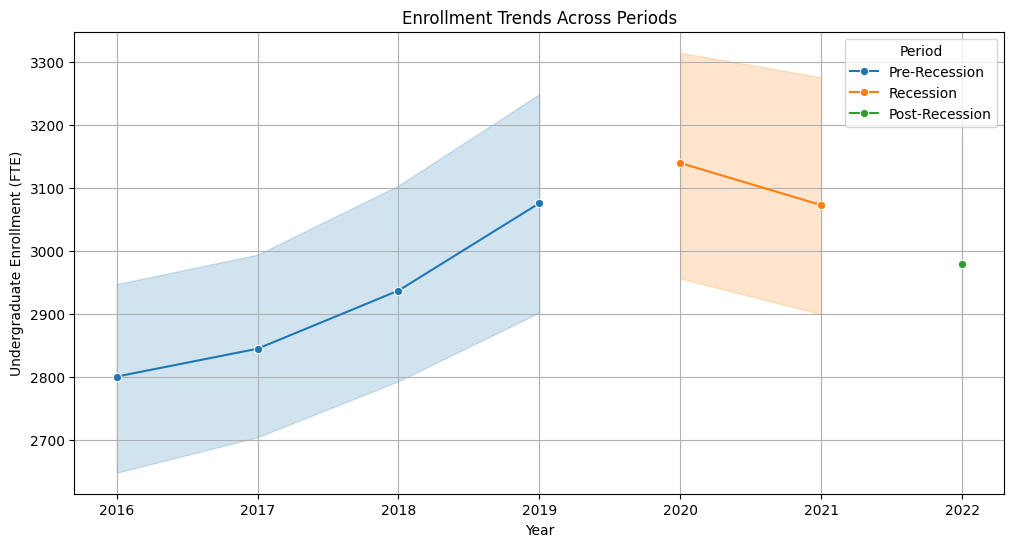

/var/folders/wj/1_k181jj7cz52k1hk5hwk0qr0000gn/T/ipykernel_16537/45319413.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Enrollment'] = model.predict(X_ols)


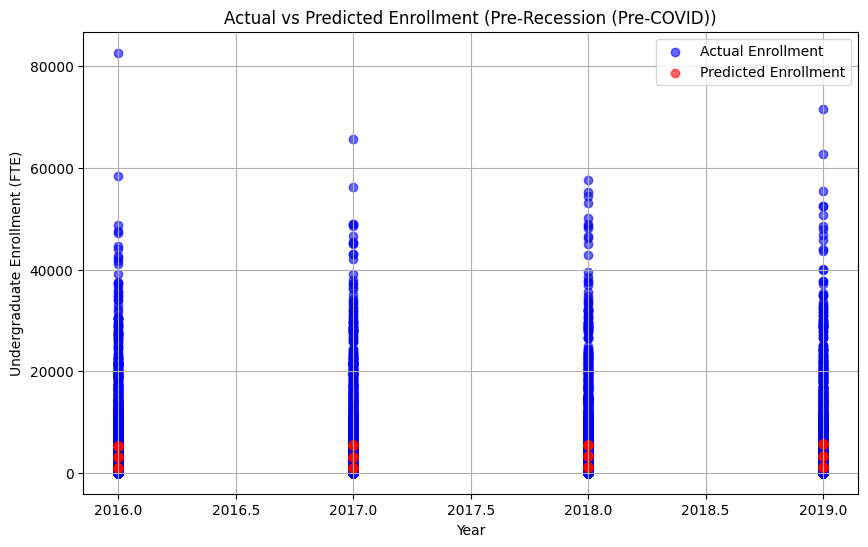

/var/folders/wj/1_k181jj7cz52k1hk5hwk0qr0000gn/T/ipykernel_16537/45319413.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Enrollment'] = model.predict(X_ols)


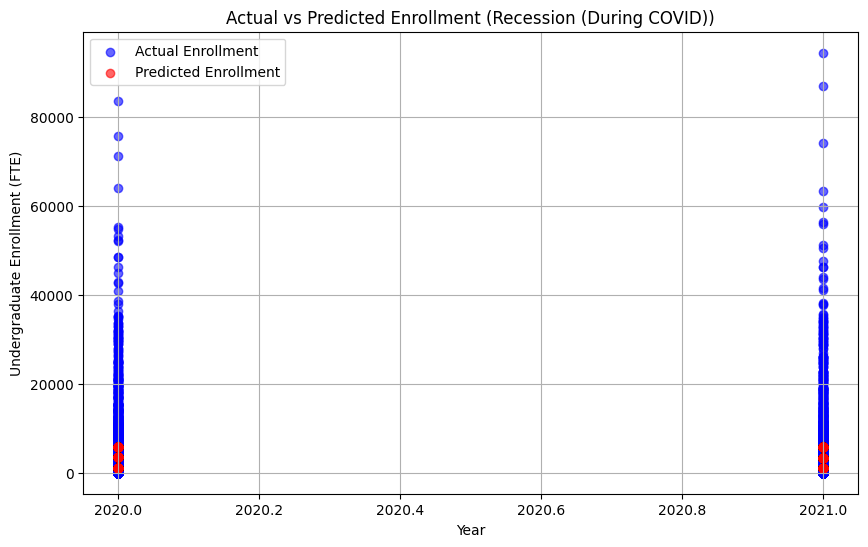

/var/folders/wj/1_k181jj7cz52k1hk5hwk0qr0000gn/T/ipykernel_16537/45319413.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Enrollment'] = model.predict(X_ols)


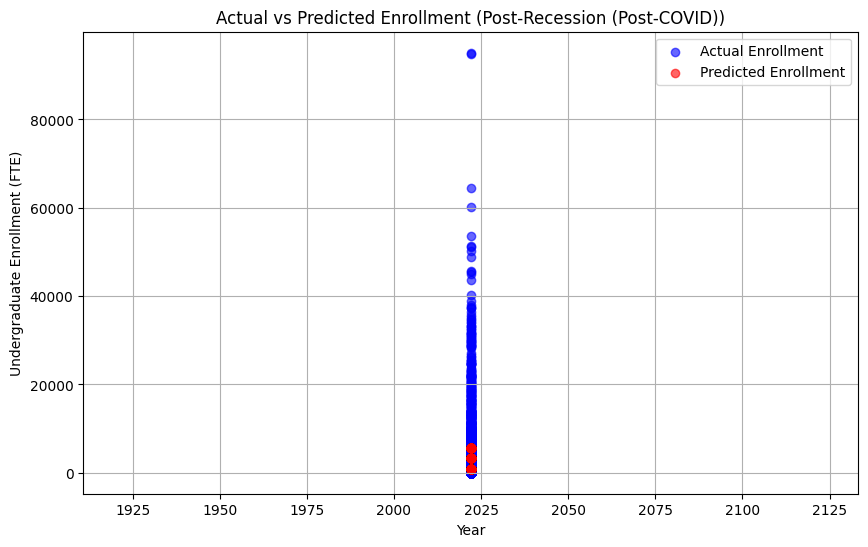

In [22]:
# Split data into periods based on Recession_Indicator
pre_recession = cleaned_data[cleaned_data['Recession_Indicator'] == 0]
recession = cleaned_data[cleaned_data['Recession_Indicator'] == 1]
post_recession = cleaned_data[cleaned_data['Recession_Indicator'] == 2]

# Function to perform regression and print summary
def run_regression(data, period_name):
    X = data[['Year', 'Activity_Type']]
    y = data['Reported_Undergraduate_Enrollment_FTE']
    X_ols = sm.add_constant(X)  # Add constant
    model = sm.OLS(y, X_ols).fit()
    print(f"\nRegression Summary for {period_name}:\n")
    print(model.summary())
    return model

# Run regressions for each period
pre_model = run_regression(pre_recession, "Pre-Recession (Pre-COVID)")
recession_model = run_regression(recession, "Recession (During COVID)")
post_model = run_regression(post_recession, "Post-Recession (Post-COVID)")

# Combine subsets into one DataFrame with a period column
pre_recession['Period'] = 'Pre-Recession'
recession['Period'] = 'Recession'
post_recession['Period'] = 'Post-Recession'
combined_data = pd.concat([pre_recession, recession, post_recession])

# Plot enrollment trends across periods
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='Year', y='Reported_Undergraduate_Enrollment_FTE', hue='Period', marker='o')
plt.title('Enrollment Trends Across Periods')
plt.xlabel('Year')
plt.ylabel('Undergraduate Enrollment (FTE)')
plt.grid()
plt.legend(title='Period')
plt.show()

# Predict enrollment for visualization
def predict_and_plot(data, model, period_name):
    X = data[['Year', 'Activity_Type']]
    X_ols = sm.add_constant(X)  # Add constant
    data['Predicted_Enrollment'] = model.predict(X_ols)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Year'], data['Reported_Undergraduate_Enrollment_FTE'], label='Actual Enrollment', alpha=0.6, color='blue')
    plt.scatter(data['Year'], data['Predicted_Enrollment'], label='Predicted Enrollment', alpha=0.6, color='red')
    plt.title(f"Actual vs Predicted Enrollment ({period_name})")
    plt.xlabel('Year')
    plt.ylabel('Undergraduate Enrollment (FTE)')
    plt.legend()
    plt.grid()
    plt.show()

# Plot predictions for each period
predict_and_plot(pre_recession, pre_model, "Pre-Recession (Pre-COVID)")
predict_and_plot(recession, recession_model, "Recession (During COVID)")
predict_and_plot(post_recession, post_model, "Post-Recession (Post-COVID)")